# Malware Classification Project
## Project McNulty - Hasan Haq

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [2]:
# bin: TotAppByte? TotPkts? TotBytes? And the rest?

# drop StartTime, SrcAddr, Sport, DstAddr, State? Proto?

# make dummies: proto, dir, state, dport, TcpOpt, sHops, sTtl

# NaNs

# Do AUC curves

# Does correlation matter here?

# OneClassSVM instead of SVM

# Nested Cross Val

# Linear SVM

In [3]:
# df = pd.read_csv('43/flows.csv')

In [4]:
# labels = {'background': 'normal', 'normal': 'normal', 'botnet': 'botnet'}
# new_label = []
# for i in tqdm(df['Label']):
#     if 'botnet' in i.lower():
#         new_label.append('botnet')
#     else:
#         new_label.append('normal')

In [5]:
# df.drop(['Max', 'Min', 'Mean'], axis=1, inplace=True)

In [6]:
# Percent of botnet class
# new_label.count("botnet")/len(new_label)

In [7]:
# df['Label'] = new_label

In [8]:
# df_clean = df.copy(deep=True)

# df_clean['Load'] = df['Load'].map(lambda x: 1 if x>0 else 0)
# df_clean['sHops'] = df['sHops'].map(lambda x: 3 if x>2 else x)
# df_clean['sTtl'].replace(to_replace=63.0, value=1, inplace=True)
# df_clean['sTtl'].replace(to_replace=127.0, value=2, inplace=True)
# df_clean['sTtl'].replace(to_replace=126.0, value=3, inplace=True)
# df_clean['sTtl'].replace(to_replace=62.0, value=4, inplace=True)
# df_clean['sTtl'] = df_clean['sTtl'].map(lambda x: 0 if x>4 else x)

# ports = df[df['Label'] == "botnet"]['Dport'].unique()
# states = df[df['Label'] == "botnet"]['State'].unique()
# protos = df[df['Label'] == "botnet"]['Proto'].unique()

# df_clean = df_clean[(df_clean['Dport'].isin(ports)) & (df_clean['State'].isin(states)) & (df_clean['Proto'].isin(protos))]

In [9]:
# df.to_pickle('flows.pkl')
# df_clean.to_pickle('flows_clean.pkl')
# df = pd.read_pickle('flows.pkl')
df_clean = pd.read_pickle('flows_clean.pkl')

In [10]:
y = df_clean['Label']
X = df_clean.drop(['StartTime', 'SrcAddr', 'Sport', 'DstAddr', 'Label'], axis=1)
X = X.drop(['Proto', 'Dir', 'State', 'Dport', 'TcpOpt', 'sHops', 'sTtl', 'TotAppByte', 'SrcBytes', 'SrcJitter', 'PCRatio', 'Load', 'TotPkts', 'pLoss'], axis=1)
# X_s = X.sample(len(y)x)

In [11]:
# X['sMaxPktSz'] = df_clean['sMaxPktSz'].fillna(df_clean['sMaxPktSz'].mean())
# X['sMinPktSz'] = df_clean['sMinPktSz'].fillna(df_clean['sMinPktSz'].mean())
# X['SIntPkt'] = df_clean['SIntPkt'].fillna(df_clean['SIntPkt'].mean())
# X['SrcJitter'] = df_clean['SrcJitter'].fillna(df_clean['SrcJitter'].mean())

X['sMaxPktSz'] = df_clean['sMaxPktSz'].fillna(0)
X['sMinPktSz'] = df_clean['sMinPktSz'].fillna(0)
X['SIntPkt'] = df_clean['SIntPkt'].fillna(0)

In [12]:
pd.isnull(X).any()

Dur           False
TotBytes      False
sMaxPktSz     False
sMinPktSz     False
sMeanPktSz    False
SIntPkt       False
dtype: bool

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901968 entries, 0 to 1808120
Data columns (total 6 columns):
Dur           901968 non-null float64
TotBytes      901968 non-null int64
sMaxPktSz     901968 non-null float64
sMinPktSz     901968 non-null float64
sMeanPktSz    901968 non-null float64
SIntPkt       901968 non-null float64
dtypes: float64(5), int64(1)
memory usage: 48.2 MB


In [14]:
# df['sMaxPktSz'].value_counts()
# df['sMinPktSz'].fillna(value=0).count()
# df['SIntPkt'].fillna(value=0).count()

In [15]:
X_scaled = scale(X)

//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [16]:
y_bin = [0 if i == 'normal' else 1 for i in y]

In [17]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, stratify=y_bin)

In [116]:
%%timeit -n1 -r1
# Logistic Regression
logreg = LogisticRegression(class_weight={0: 0.02})
log_acc = cross_val_score(logreg, X, y_bin, cv=10, scoring='f1')
print(log_acc)

[ 0.28016878  0.19844752  0.20912046  0.20348953  0.18748092  0.2804677
  0.20021005  0.17272686  0.15904856  0.15423928]
1 loop, best of 1: 2min 29s per loop


In [14]:
%%timeit -n1 -r1
# Gaussian Naive Bayes

gauss = GaussianNB()
gauss_acc = cross_val_score(gauss, X_scaled, y_bin, cv=10, scoring='f1')
print(gauss_acc)

[ 0.34936039  0.34604206  0.36204588  0.32195976  0.31369916  0.44456191
  0.33336857  0.33661053  0.25460637  0.28098032]
1 loop, best of 1: 7.88 s per loop


In [ ]:
# SVM
svm = SVC(class_weight={0: 0.05},)
svm_acc = cross_val_score(svm, X_scaled, y_bin, cv=10, scoring='f1')
print(svm_acc)

In [13]:
%%timeit -n1 -r1
# Decision Trees

tree = DecisionTreeClassifier()
tree_acc = cross_val_score(tree, X_scaled, y_bin, cv=10, scoring='f1')
print(tree_acc)

[ 0.83762955  0.86956522  0.93167106  0.93202063  0.90268051  0.91125434
  0.89517138  0.87565507  0.89868242  0.87020369]
1 loop, best of 1: 54.6 s per loop


In [19]:
%%timeit -n1 -r1
# Random Forests
# try depth to 5 or 6
forest = RandomForestClassifier(class_weight={0:0.02})
forest_acc = cross_val_score(forest, X_train, y_train, cv=10, scoring='f1')
print(forest_acc)

[ 0.92302309  0.91990206  0.90477876  0.90571328  0.91958042  0.91608392
  0.91974878  0.92129304  0.91739895  0.92681235]
1 loop, best of 1: 2min 26s per loop


Feature ranking:
1. feature 2 (0.332135)
2. feature 3 (0.161768)
3. feature 4 (0.144573)
4. feature 0 (0.127583)
5. feature 1 (0.127541)
6. feature 5 (0.106401)


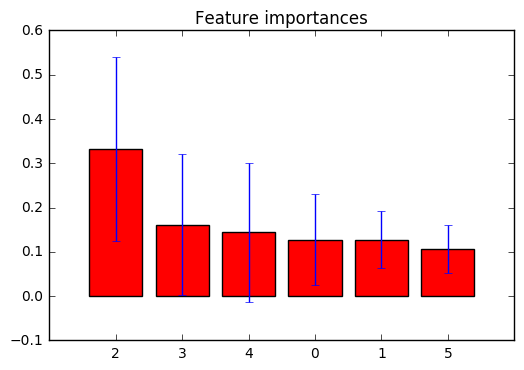

In [27]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Out of Sample Testing

## Stratified Sample

In [ ]:
# Random Forests
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train,y_train)
ypred = forest.predict(X_test)
recall_score(y_test, ypred)

In [ ]:
# Logistic Regression

## 100% Botnet

In [74]:
df_test = pd.read_csv('01/botnet_test.csv')

In [75]:
df_test_clean = df_test.copy(deep=True)

df_test_clean['Load'] = df_test['Load'].map(lambda x: 1 if x>0 else 0)
df_test_clean['sHops'] = df_test['sHops'].map(lambda x: 3 if x>2 else x)
df_test_clean['sTtl'].replace(to_replace=63.0, value=1, inplace=True)
df_test_clean['sTtl'].replace(to_replace=127.0, value=2, inplace=True)
df_test_clean['sTtl'].replace(to_replace=126.0, value=3, inplace=True)
df_test_clean['sTtl'].replace(to_replace=62.0, value=4, inplace=True)
df_test_clean['sTtl'] = df_test_clean['sTtl'].map(lambda x: 0 if x>4 else x)

# ports = df_test[df_test['Label'] == "botnet"]['Dport'].unique()
# states = df_test[df_test['Label'] == "botnet"]['State'].unique()
# protos = df_test[df_test['Label'] == "botnet"]['Proto'].unique()

# df_test_clean = df_test_clean[(df_clean['Dport'].isin(ports)) & (df_test_clean['State'].isin(states)) & (df_test_clean['Proto'].isin(protos))]

In [117]:
Xbot_test = df_test.drop(['StartTime', 'SrcAddr', 'Sport', 'DstAddr', 'Label'], axis=1)
Xbot_test = Xbot_test.drop(['Proto', 'Dir', 'State', 'Dport', 'TcpOpt', 'sHops', 'sTtl', 'TotAppByte', 'SrcBytes', 'SrcJitter', 'PCRatio', 'Load', 'TotPkts', 'pLoss'], axis=1)
ybot_test = [1 for x in range(len(Xbot_test))]

In [118]:
Xbot_test['sMaxPktSz'] = df_test['sMaxPktSz'].fillna(0)
Xbot_test['sMinPktSz'] = df_test['sMinPktSz'].fillna(0)
Xbot_test['SIntPkt'] = df_test['SIntPkt'].fillna(0)

In [84]:
pd.isnull(Xbot_test).any()

Dur           False
TotBytes      False
sMaxPktSz     False
sMinPktSz     False
sMeanPktSz    False
SIntPkt       False
dtype: bool

In [85]:
Xbot_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41324 entries, 0 to 41323
Data columns (total 6 columns):
Dur           41324 non-null float64
TotBytes      41324 non-null int64
sMaxPktSz     41324 non-null int64
sMinPktSz     41324 non-null int64
sMeanPktSz    41324 non-null float64
SIntPkt       41324 non-null float64
dtypes: float64(3), int64(3)
memory usage: 1.9 MB


In [ ]:
forest = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight={0:0.01})
forest.fit(X,y_bin)
# ypred_prob = forest.predict_proba(Xbot_test)
ypred = forest.predict(Xbot_test)

In [120]:
sum(ypred)

13216

In [121]:
print("Accuracy: ", accuracy_score(y_test, ypred))
print("Precision: ", precision_score(y_test, ypred))
print("Recall: ", recall_score(y_test, ypred))
print("F1: ", f1_score(y_test, ypred))

Accuracy:  0.319814151583
Precision:  1.0
Recall:  0.319814151583
F1:  0.48463513018


In [49]:
np.bincount(ypred[:,1],minlength

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [27]:
sum(y_test)

6282

In [51]:
np.nan in ypred

False

In [112]:
len(ypred_prob[:,1][ypred_prob[:,1]>.])

30730

In [ ]:
len(X_test)